# Leadangle_fitplot.ipynb

`Leadangle_fit.py`で計算した結果をプロットする。

In [127]:
from scipy import stats
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import LinearSegmentedColormap  # colormapをカスタマイズする
import matplotlib.colors as colors
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import B_JRM33 as BJRM
import B_equator as BEQ
import Leadangle_wave as LeadA
from TScmap import TScmap

# Color universal design
cud4 = ['#FF3300', '#FFF100', '#03AF7A', '#005AFF', '#4DC4FF', '#FF8082', '#F6AA00', '#990099', '#804000']
cud4bs = ['#FFCABF', '#FFFF80', '#D8F255', '#BFE4FF', '#FFCA80', '#77D9A8', '#C9ACE6', '#84919E']

# matplotlib フォント設定
fontname = 'Nimbus Sans'
plt.rcParams.update({'font.sans-serif': fontname,
                     'font.family': 'sans-serif',
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': fontname,
                     'mathtext.it': fontname+':italic',
                     # 'mathtext.bf': 'Nimbus Sans:italic:bold',
                     'mathtext.bf': fontname+':bold'
                     })
params = {
    # 'lines.markersize': 1,
    # 'lines.linewidth': 1,
    'axes.linewidth': 2,
    'xtick.major.size': 5,
    'xtick.minor.size': 3.5,
    'xtick.major.width': 2.0,
    'xtick.minor.width': 1.25,
    'ytick.major.size': 5,
    'ytick.minor.size': 3,
    'ytick.major.width': 2.0,
    'ytick.minor.width': 1.25,
}
plt.rcParams.update(params)

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append((v / vmax, c))
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

whiteblue=generate_cmap(['#000000','#010E5E','#042AA6','#0F7CE0','#1AC7FF','#FFFFFF'])

RJ = 71492E+3        # 木星半径[m]   
AMU = 1.66E-27       # [kg]
Ai = 18              # 平均イオン原子量 (Bagenal+2015)
Hp0 = 0.64*RJ        # 基準スケールハイト [m] (Bagenal&Delamere2011)


In [118]:
# Set legend shadow
def legend_shadow(fig, ax, legend, dx, dy):

  frame = legend.get_window_extent()

  xmin, ymin = fig.transFigure.inverted().transform((frame.xmin, frame.ymin))
  xmax, ymax = fig.transFigure.inverted().transform((frame.xmax, frame.ymax))

  # plot patch shadow
  rect = patches.Rectangle((xmin+dx, ymin+dy), xmax-xmin, ymax-ymin, 
                          transform=fig.transFigure,
                          edgecolor='k', facecolor='k',
                          clip_on=False)
  ax.add_patch(rect)

  return None

[]

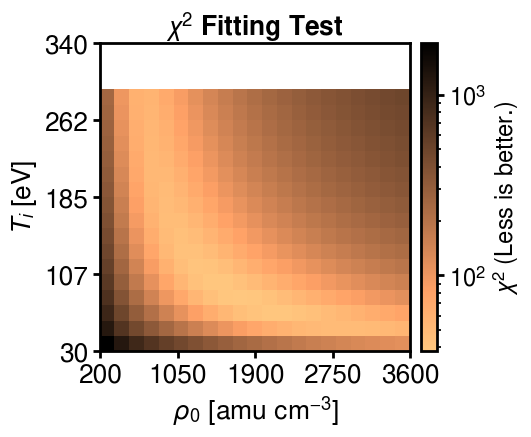

In [2]:
chi2 = np.loadtxt('img/LeadangleFit/test2/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/test2/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/test2/params_Ti0.txt')

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

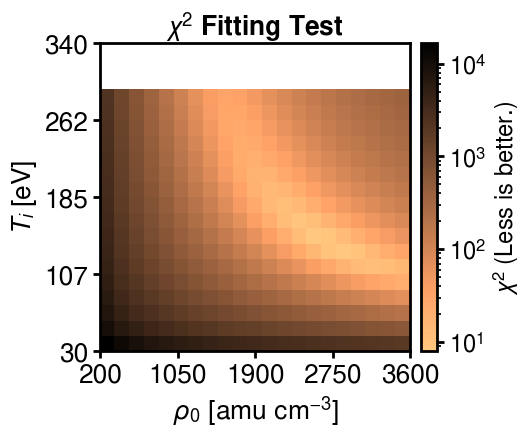

In [3]:
chi2 = np.loadtxt('img/LeadangleFit/test4/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/test4/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/test4/params_Ti0.txt')

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

In [4]:
from scipy import stats
print(stats.chi2.pdf(30, 2))

1.5295116025091287e-07


In [5]:
from scipy import stats
print(stats.chi2.pdf(9.458, 3))

0.01084004576524119


In [6]:
from scipy import stats
print(stats.chi2.pdf(3.84, 1))

0.029846887483060566


[]

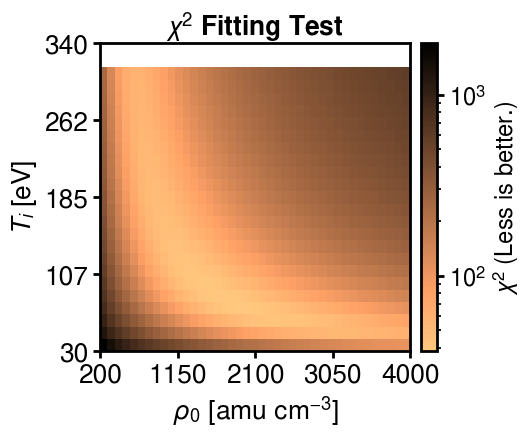

In [7]:
chi2 = np.loadtxt('img/LeadangleFit/2014_1/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2014_1/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_1/params_Ti0.txt')

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

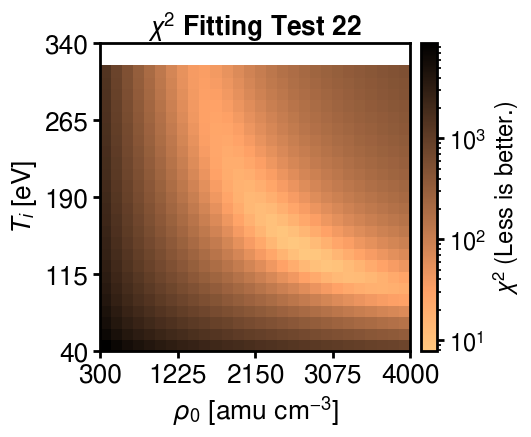

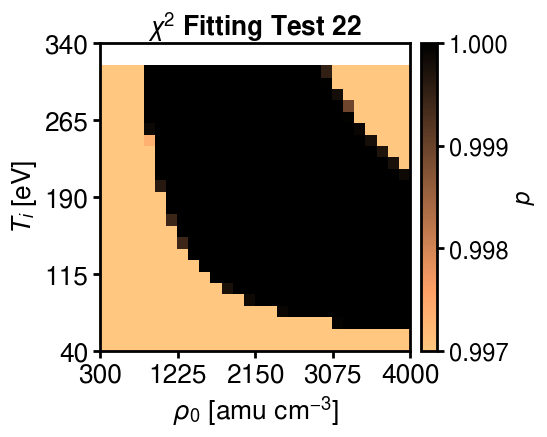

In [8]:
chi2 = np.loadtxt('img/LeadangleFit/2022_1/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2022_1/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2022_1/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=365)

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 22', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()



# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 22', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
sm = ax.pcolor(p_value, cmap='copper_r', vmin=0.997, vmax=1)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$p$', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

[]

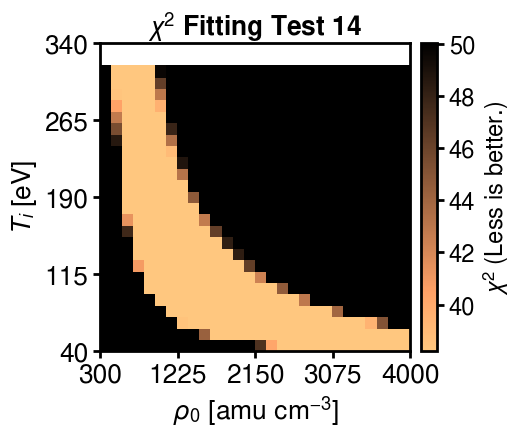

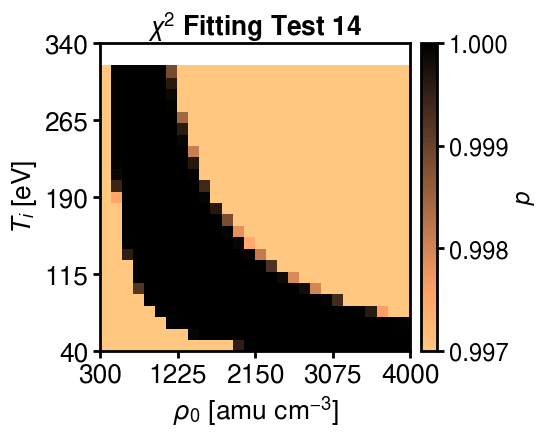

In [9]:
chi2 = np.loadtxt('img/LeadangleFit/2014_2/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2014_2/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_2/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 14', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
sm = ax.pcolor(chi2-chi2min, cmap='copper_r', vmin=chi2min, vmax=chi2min+11.8)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()


# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 14', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
sm = ax.pcolor(p_value, cmap='copper_r', vmin=0.997, vmax=1)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$p$', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()


In [10]:
stats.chi2.sf(x=200, df=156)

0.010007995407871808

[]

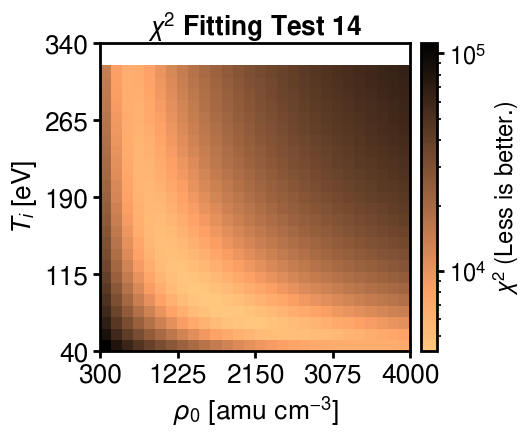

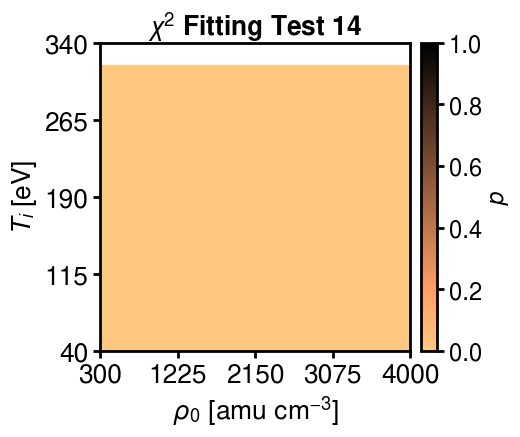

In [11]:
chi2 = np.loadtxt('img/LeadangleFit/2014_3/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2014_3/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_3/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 14', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()


# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 14', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
sm = ax.pcolor(p_value, cmap='copper_r', vmin=0, vmax=1)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$p$', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

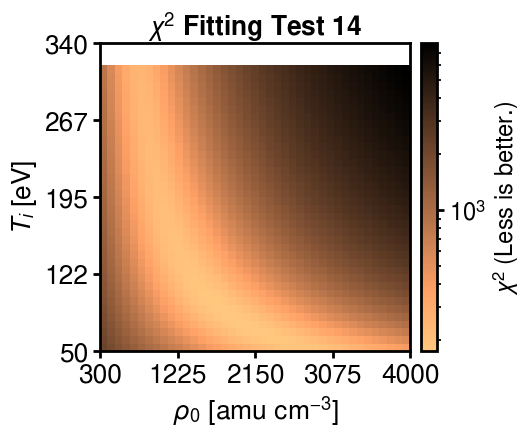

In [12]:
chi2 = np.loadtxt('img/LeadangleFit/test5/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/test5/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/test5/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 14', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

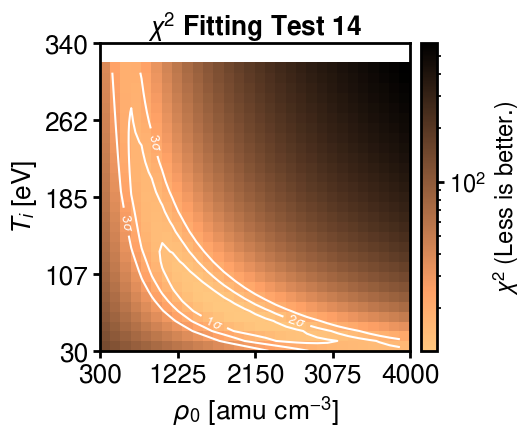

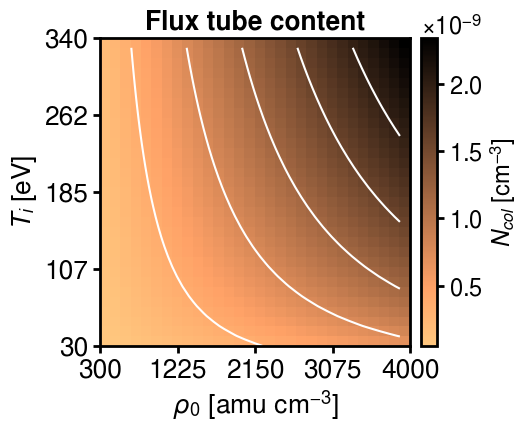

In [13]:
chi2 = np.loadtxt('img/LeadangleFit/test6/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/test6/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/test6/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 14', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors='#ffffff')
cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.5)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()



# Plot
Hp = Hp0*np.sqrt(Ti0/Ai)
alpha = 1/(Hp**2)
Ncol = RHO0*(1E+6)*AMU*np.sqrt(np.pi/alpha)

fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('Flux tube content', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(Ncol, cmap='copper_r')
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(Ncol, levels=6, colors='#ffffff')

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label(r'$N_{col}$ [cm$^{-3}$]', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ
pp.ax.yaxis.set_major_formatter(
        ptick.ScalarFormatter(useMathText=True))    # 指数表記
pp.ax.yaxis.set_offset_position('left')

plt.plot()

[]

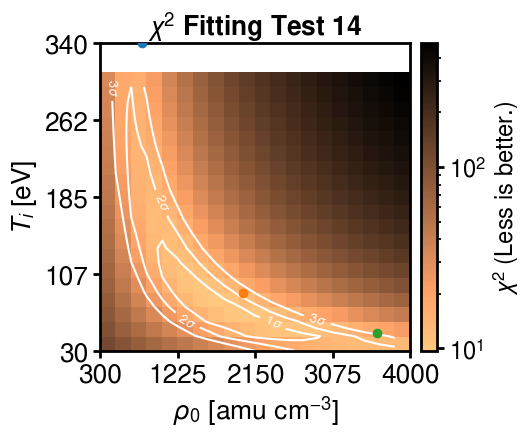

In [14]:
chi2 = np.loadtxt('img/LeadangleFit/test7/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/test7/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/test7/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 14', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
ax.scatter(rho_LH, Ti_LH, zorder=3)
ax.scatter(rho_M, Ti_M, zorder=3)
ax.scatter(rho_HC, Ti_HC, zorder=3)

sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max), zorder=1)
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors='#ffffff', zorder=2)
cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.5)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

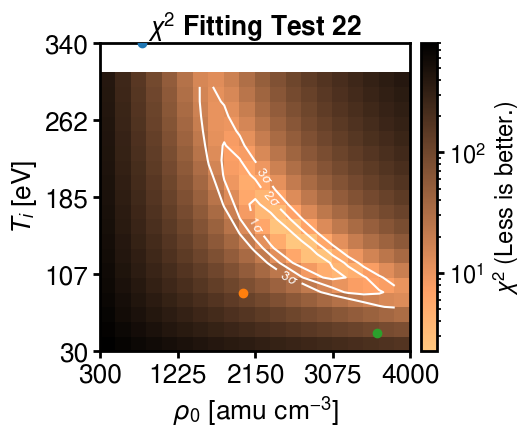

In [15]:
chi2 = np.loadtxt('img/LeadangleFit/test8/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/test8/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/test8/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 22', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
ax.scatter(rho_LH, Ti_LH, zorder=3)
ax.scatter(rho_M, Ti_M, zorder=3)
ax.scatter(rho_HC, Ti_HC, zorder=3)

sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max), zorder=1)
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors='#ffffff', zorder=2)
cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.5)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

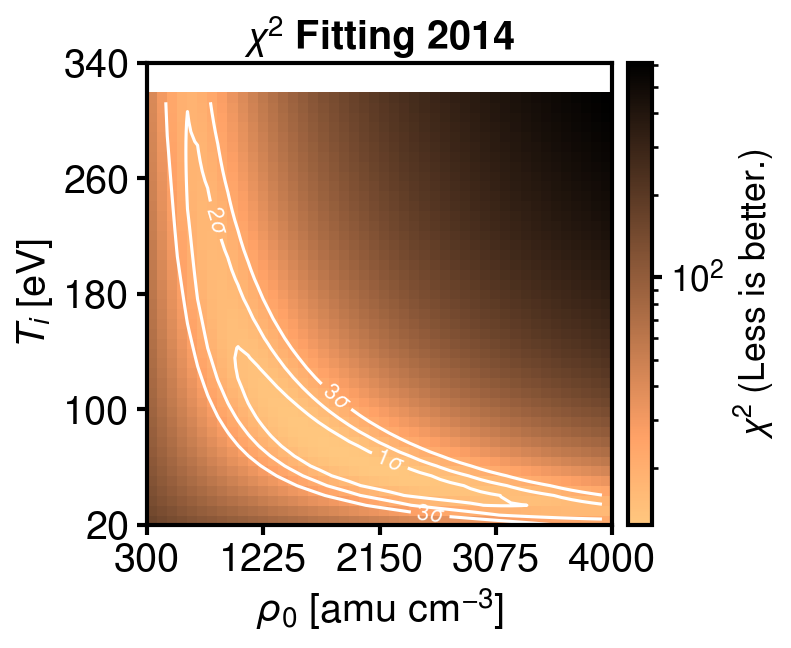

In [158]:
chi2 = np.loadtxt('img/LeadangleFit/2014_5/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2014_5/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_5/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=150)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting 2014', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# ax.scatter(rho_LH, Ti_LH, zorder=3)
# ax.scatter(rho_M, Ti_M, zorder=3)
# ax.scatter(rho_HC, Ti_HC, zorder=3)

sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max), zorder=1)
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors='#ffffff', zorder=2)
cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.55)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

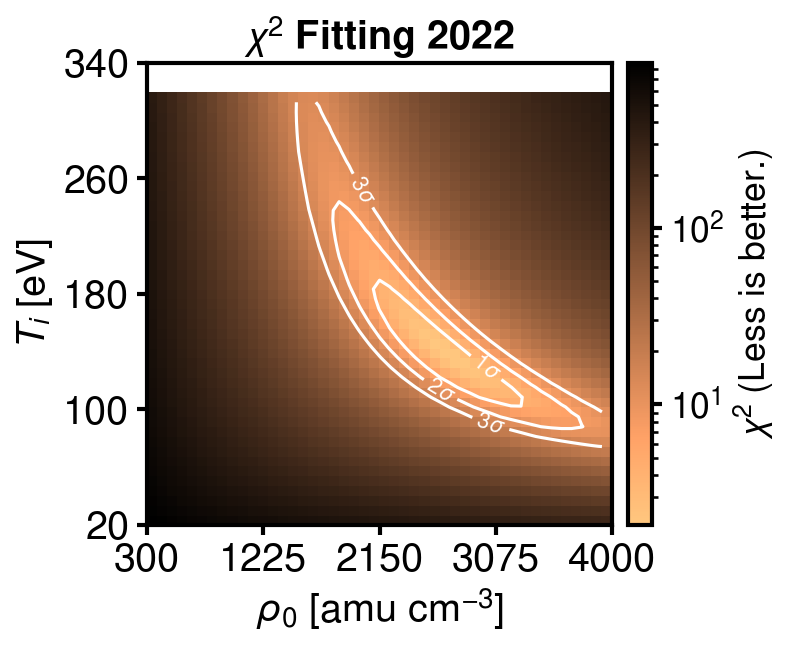

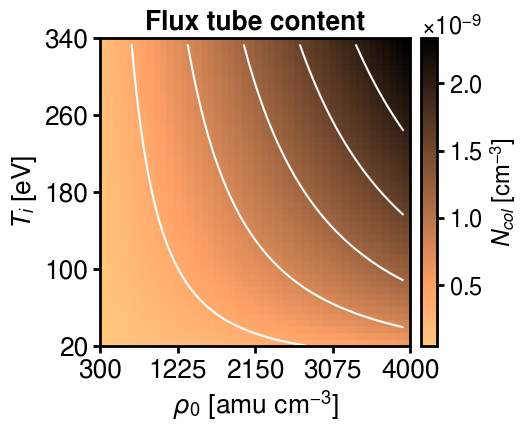

In [157]:
chi2 = np.loadtxt('img/LeadangleFit/2022_5/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2022_5/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2022_5/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=150)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting 2022', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# ax.scatter(rho_LH, Ti_LH, zorder=3)
# ax.scatter(rho_M, Ti_M, zorder=3)
# ax.scatter(rho_HC, Ti_HC, zorder=3)

sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max), zorder=1)
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors='#ffffff', zorder=2)
cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.55)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

# Plot
Hp = Hp0*np.sqrt(Ti0/Ai)
alpha = 1/(Hp**2)
Ncol = RHO0*(1E+6)*AMU*np.sqrt(np.pi/alpha)

fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('Flux tube content', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(Ncol, cmap='copper_r')
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(Ncol, levels=6, colors='#ffffff')

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label(r'$N_{col}$ [cm$^{-3}$]', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ
pp.ax.yaxis.set_major_formatter(
        ptick.ScalarFormatter(useMathText=True))    # 指数表記
pp.ax.yaxis.set_offset_position('left')

plt.plot()

(array([6]), array([21])) rho_min [2026.66666667] Ti_min [61.73913043]
(array([17]), array([29])) rho_min [2684.44444444] Ti_min [138.26086957]


[]

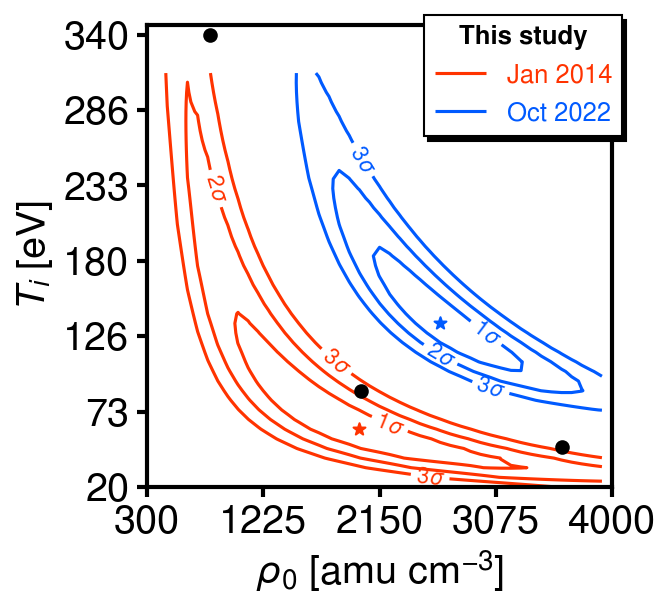

In [159]:
RHO0 = np.loadtxt('img/LeadangleFit/2014_5/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_5/params_Ti0.txt')

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx


# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=150)
ax.tick_params(axis='both', labelsize=fontsize)
# ax.set_title('$\\chi^2$ Fitting 14 & 22', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xlim(0,chi2.shape[1])
ax.set_ylim(0,chi2.shape[0]+1)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],7))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),7,dtype=int))
ax.scatter(rho_LH, Ti_LH, color='k', zorder=3)
ax.scatter(rho_M, Ti_M, color='k', zorder=3)
ax.scatter(rho_HC, Ti_HC, color='k', zorder=3)

yr = ['14', '22']
redblue = [cud4[0], cud4[3]]
cn_list = []
for i in range(2):
    chi2 = np.loadtxt('img/LeadangleFit/20'+yr[i]+'_5/params_chi2.txt')
    # chi square 0 is not true value.
    chi2min = np.min(chi2[np.where(chi2>0)])
    chi2min_pos = np.where(chi2==chi2min)
    chi2max = np.max(chi2[np.where(chi2>0)])
    chi2ave = np.average(chi2[np.where(chi2>0)])
    chi2[np.where(chi2==0)] = np.nan
    print(chi2min_pos, 'rho_min', RHO0[chi2min_pos], 'Ti_min', Ti0[chi2min_pos])

    ax.scatter(chi2min_pos[1], chi2min_pos[0], marker='*', color=redblue[i], zorder=3)
    cn = ax.contour(chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors=redblue[i], zorder=2)
    cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
    ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.55)
    cn_list.append(cn)

# second legend
h1,_ = cn_list[0].legend_elements()
h2,_ = cn_list[1].legend_elements()
legend1 = ax.legend([h1[0],h2[0]],['Jan 2014','Oct 2022'],
                    loc='upper right',
                    bbox_to_anchor=(1.05, 1.05),
                    fancybox=False,
                    facecolor='white',
                    framealpha=1,
                    edgecolor='k',
                    fontsize=fontsize*0.65,)
legend1.set_title('This study', prop={'size': fontsize*0.65, 'weight': 'bold'})
legend_shadow(fig, ax, legend1, dx=0.006, dy=-0.008)

# get contour colors
i = 0
for leg2text in legend1.get_texts():
    leg2text.set_color(redblue[i])
    i += 1

plt.plot()

### Bagenal+2015 Galileo結果に重ねる

In [19]:
# Constants
Zi = 1.4    # mean charge of ions (Bagenal+2015) [q]
Ai = 18     # (Bagenal+2015) [amu]


[]

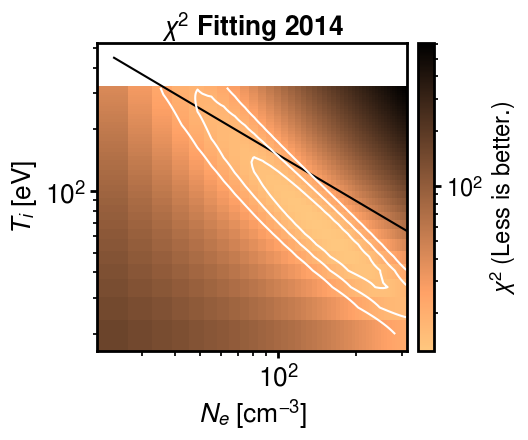

In [154]:
chi2 = np.loadtxt('img/LeadangleFit/2014_5/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2014_5/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_5/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx

# Galieo fit - Bagenal+2015
Ne_fit = np.linspace(np.min((RHO0/Ai)*Zi), np.max((RHO0/Ai)*Zi), 20)
Ti_fit = 370*(30/Ne_fit)**0.75

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting 2014', weight='bold', fontsize=fontsize)
ax.set_xlabel('$N_e$ [cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xticks(np.linspace(0,chi2.shape[1],5))
# ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
# ax.set_yticks(np.linspace(0,chi2.shape[0],5))
# ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# ax.scatter(rho_LH, Ti_LH, zorder=3)
# ax.scatter(rho_M, Ti_M, zorder=3)
# ax.scatter(rho_HC, Ti_HC, zorder=3)

ax.plot(Ne_fit, Ti_fit, color='k', zorder=1.5)

sm = ax.pcolor((RHO0/Ai)*Zi, Ti0, chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max), zorder=1)
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour((RHO0/Ai)*Zi, Ti0, chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors='#ffffff', zorder=2)
# cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
# ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.55)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

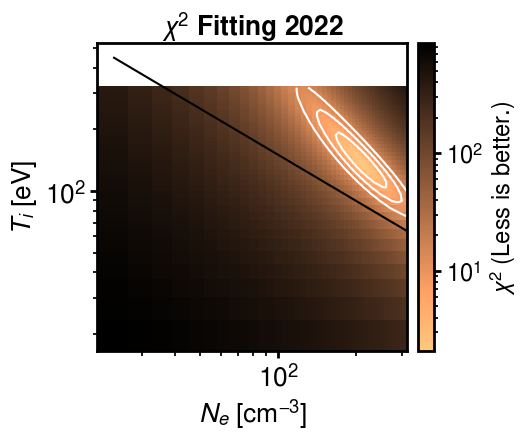

In [153]:
chi2 = np.loadtxt('img/LeadangleFit/2022_5/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2022_5/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2022_5/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx

# Galieo fit - Bagenal+2015
Ne_fit = np.linspace(np.min((RHO0/Ai)*Zi), np.max((RHO0/Ai)*Zi), 20)
Ti_fit = 370*(30/Ne_fit)**0.75

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting 2022', weight='bold', fontsize=fontsize)
ax.set_xlabel('$N_e$ [cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xticks(np.linspace(0,chi2.shape[1],5))
# ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
# ax.set_yticks(np.linspace(0,chi2.shape[0],5))
# ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# ax.scatter(rho_LH, Ti_LH, zorder=3)
# ax.scatter(rho_M, Ti_M, zorder=3)
# ax.scatter(rho_HC, Ti_HC, zorder=3)

ax.plot(Ne_fit, Ti_fit, color='k', zorder=1.5)

sm = ax.pcolor((RHO0/Ai)*Zi, Ti0, chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max), zorder=1)
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour((RHO0/Ai)*Zi, Ti0, chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors='#ffffff', zorder=2)
# cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
# ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.55)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

(array([6]), array([21])) rho_min [2026.66666667] Ti_min [61.73913043]
(array([17]), array([29])) rho_min [2684.44444444] Ti_min [138.26086957]


[]

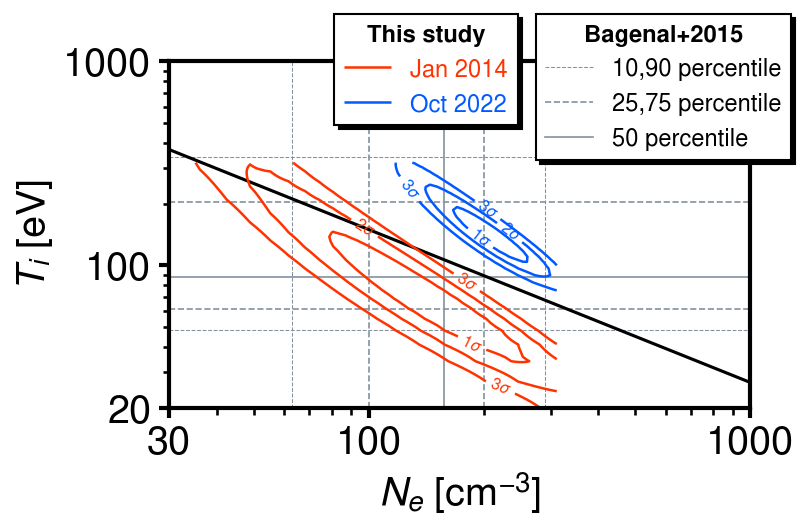

In [152]:
RHO0 = np.loadtxt('img/LeadangleFit/2014_5/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_5/params_Ti0.txt')

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx

# Galieo fit - Bagenal+2015
Ne_fit = np.linspace(30, 1000, 20)
Ti_fit = 370*((30/Ne_fit)**0.75)

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(5,3), dpi=150)
ax.tick_params(axis='both', which='both', labelsize=fontsize)
# ax.set_title('$\\chi^2$ Fitting 14 & 22', weight='bold', fontsize=fontsize)
ax.set_xlabel('$N_e$ [cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(30,1000)
ax.set_ylim(20,1000)
ax.set_xticks(np.array([30,100,1000], dtype=int))
ax.set_xticklabels(np.array([30,100,1000], dtype=int))
ax.set_yticks(np.array([20,100,1000], dtype=int))
ax.set_yticklabels(np.array([20,100,1000], dtype=int))
ax.scatter(rho_LH, Ti_LH, color='k', zorder=3)
ax.scatter(rho_M, Ti_M, color='k', zorder=3)
ax.scatter(rho_HC, Ti_HC, color='k', zorder=3)

yr = ['14', '22']
redblue = [cud4[0], cud4[3]]
cn_list = []
for i in range(2):
    chi2 = np.loadtxt('img/LeadangleFit/20'+yr[i]+'_5/params_chi2.txt')
    # chi square 0 is not true value.
    chi2min = np.min(chi2[np.where(chi2>0)])
    chi2min_pos = np.where(chi2==chi2min)
    chi2max = np.max(chi2[np.where(chi2>0)])
    chi2ave = np.average(chi2[np.where(chi2>0)])
    chi2[np.where(chi2==0)] = np.nan
    print(chi2min_pos, 'rho_min', RHO0[chi2min_pos], 'Ti_min', Ti0[chi2min_pos])

    # ax.scatter(chi2min_pos[1], chi2min_pos[0], marker='*', color=redblue[i], zorder=3)
    cn = ax.contour((RHO0/Ai)*Zi, Ti0, chi2,
                    levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8],
                    colors=redblue[i],
                    linewidths=1.2,
                    zorder=2)
    cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
    ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.4)
    cn_list.append(cn)

ax.plot(Ne_fit, Ti_fit, color='k', zorder=1.5)
ax.axhline(y=340, color=cud4bs[7], linewidth=0.5, label='10,90 percentile', linestyle='dashed', zorder=0.9)  # H/C
ax.axvline(x=63, color=cud4bs[7], linewidth=0.5, linestyle='dashed', zorder=0.9)   # H/C
ax.axhline(y=205, color=cud4bs[7], linewidth=0.8, label='25,75 percentile', linestyle='dashed', zorder=0.9)    # 75
ax.axvline(x=100, color=cud4bs[7], linewidth=0.8, linestyle='dashed', zorder=0.9)    # 25
ax.axhline(y=88, color=cud4bs[7], linewidth=0.8, label='50 percentile', zorder=0.9)  # Medium
ax.axvline(x=158, color=cud4bs[7], linewidth=0.8, zorder=0.9)                        # Medium
ax.axhline(y=61, color=cud4bs[7], linewidth=0.8, linestyle='dashed', zorder=0.9)     # 25
ax.axvline(x=200, color=cud4bs[7], linewidth=0.8, linestyle='dashed', zorder=0.9)    # 75
ax.axhline(y=48, color=cud4bs[7], linewidth=0.5, linestyle='dashed', zorder=0.9)   # L/H
ax.axvline(x=290, color=cud4bs[7], linewidth=0.5, linestyle='dashed', zorder=0.9)  # L/H


# first legend
legend1 = ax.legend(loc='upper right',
                    bbox_to_anchor=(1.09, 1.17),
                    fancybox=False,
                    facecolor='white',
                    framealpha=1,
                    edgecolor='k',
                    fontsize=fontsize*0.6,)
legend1.set_title('Bagenal+2015', prop={'size': fontsize*0.6, 'weight': 'bold'})
legend_shadow(fig, ax, legend1, dx=0.006, dy=-0.008)

# second legend
h1,_ = cn_list[0].legend_elements()
h2,_ = cn_list[1].legend_elements()
legend2 = ax.legend([h1[0],h2[0]],['Jan 2014','Oct 2022'],
                    loc='upper right',
                    bbox_to_anchor=(0.62, 1.17),
                    fancybox=False,
                    facecolor='white',
                    framealpha=1,
                    edgecolor='k',
                    fontsize=fontsize*0.6,)
legend2.set_title('This study', prop={'size': fontsize*0.6, 'weight': 'bold'})
legend_shadow(fig, ax, legend2, dx=0.006, dy=-0.008)

# get contour colors
i = 0
for leg2text in legend2.get_texts():
    leg2text.set_color(redblue[i])
    i += 1

ax.add_artist(legend1)
plt.plot()

In [23]:
print(370*(30/158)**0.75)

106.42651714180613
